In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import numpy as np
def zca_whiten(X):
    """
    Applies ZCA whitening to the data (X)
    http://xcorr.net/2011/05/27/whiten-a-matrix-matlab-code/

    X: numpy 2d array
        input data, rows are data points, columns are features

    Returns: ZCA whitened 2d array
    """
    assert(X.ndim == 2)
    EPS = 10e-5

    #   covariance matrix
    cov = np.dot(X.T, X)
    #   d = (lambda1, lambda2, ..., lambdaN)
    u, E, v = np.linalg.eigh(cov)
    #   D = diag(d) ^ (-1/2)
    D = np.diag(1. / np.sqrt(E + EPS))
    #   W_zca = E * D * E.T
    W = np.dot(np.dot(E, D), u.T)

    X_white = np.dot(X, W)

    return X_white

def zca_whitening_matrix(X, rowvar=False):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=rowvar) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,E,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # E: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    D = np.diag(1.0/np.sqrt(E + epsilon))
    ZCAMatrix = np.dot(U, np.dot(D, V)) # [M x M]
    return ZCAMatrix


def flatten_matrix(matrix):
    vector = matrix.flatten(1)
    vector = vector.reshape(1, len(vector))
    return vector

def zca_whitening(inputs):
    print(inputs.shape[1])
    sigma = np.dot(inputs, inputs.T)/inputs.shape[1] #Correlation matrix
    U,S,V = np.linalg.svd(sigma) #Singular Value Decomposition
    epsilon = 1.e-5                #Whitening constant, it prevents division by zero
    D=np.diag(1.0/np.sqrt(np.diag(S + epsilon)))
    ZCAMatrix = np.dot(np.dot(U,D ),V) #ZCA Whitening matrix
    return np.dot(ZCAMatrix, inputs)   #Data whitening

In [2]:
new_attribute=None

import p5_util
import P7_DataBreed
if new_attribute is None :
    is_saved = True
    filename='./data/oP7_DataBreed.dump'
    oP7_DataBreed_save = P7_DataBreed.P7_DataBreed()
    try: 
        oP7_DataBreed
    except NameError:
        print('*** INFO : oP7_DataBreed is not defined; loading...')
        oP7_DataBreed = p5_util.object_load(filename)
        is_saved = False
    oP7_DataBreed_save.copy(oP7_DataBreed)
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)
    del(oP7_DataBreed_save)
    oP7_DataBreed.show()
    is_saved=True
    if is_saved is True:
        print('*** INFO : oP7_DataBreed is saved')
        p5_util.object_dump(oP7_DataBreed,filename)


*** INFO : oP7_DataBreed is not defined; loading...
p5_util.object_load : fileName= ./data/oP7_DataBreed.dump

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 3543
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (3188, 19)
y train size .................. : (3188, 7)
X test size ................... : (355, 19)
y test size ................... : (355, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (3543, 19)
Labels from dataset ........... : (3543, 7)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (111260, 128)
Classifier name ............... : Bernoulli NB
Supported classifiers ......... : ['Bernoulli NB']

*** INFO : oP7_DataBreed 

In [67]:
del(dict_image)

In [3]:
import P7_DataBreed
oP7_DataBreed.breed_show()


Identifier= n02107142-Doberman  Breed name= Doberman
Identifier= n02116738-African_hunting_dog  Breed name= African_hunting_dog
Identifier= n02105162-malinois  Breed name= malinois
Identifier= n02113799-standard_poodle  Breed name= standard_poodle
Identifier= n02115641-dingo  Breed name= dingo
Identifier= n02109525-Saint_Bernard  Breed name= Saint_Bernard
Identifier= n02108089-boxer  Breed name= boxer


In [4]:
import P7_DataBreed

oP7_DataBreed.show_image_name('dingo')


Number of images =63
Image name= n02115641_5178.jpg
Image name= n02115641_3862.jpg
Image name= n02115641_1969.jpg
Image name= n02115641_9686.jpg
Image name= n02115641_11717.jpg
Image name= n02115641_10604.jpg
Image name= n02115641_6639.jpg
Image name= n02115641_12836.jpg
Image name= n02115641_2096.jpg
Image name= n02115641_10286.jpg
Image name= n02115641_2636.jpg
Image name= n02115641_14084.jpg
Image name= n02115641_9067.jpg
Image name= n02115641_12709.jpg
Image name= n02115641_3736.jpg
Image name= n02115641_12148.jpg
Image name= n02115641_10506.jpg
Image name= n02115641_5492.jpg
Image name= n02115641_10570.jpg
Image name= n02115641_1380.jpg
Image name= n02115641_670.jpg
Image name= n02115641_3494.jpg
Image name= n02115641_4800.jpg
Image name= n02115641_14495.jpg
Image name= n02115641_13450.jpg
Image name= n02115641_1513.jpg
Image name= n02115641_11699.jpg
Image name= n02115641_9348.jpg
Image name= n02115641_4677.jpg
Image name= n02115641_6380.jpg
Image name= n02115641_10395.jpg
Image

(289, 290)


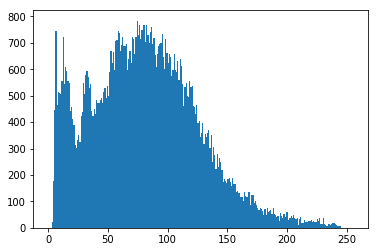

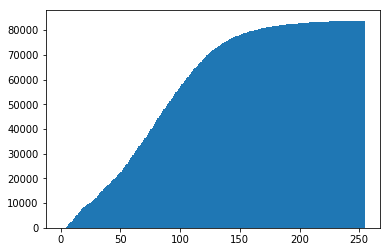

KP= 1109
DESC= (1109, 128)


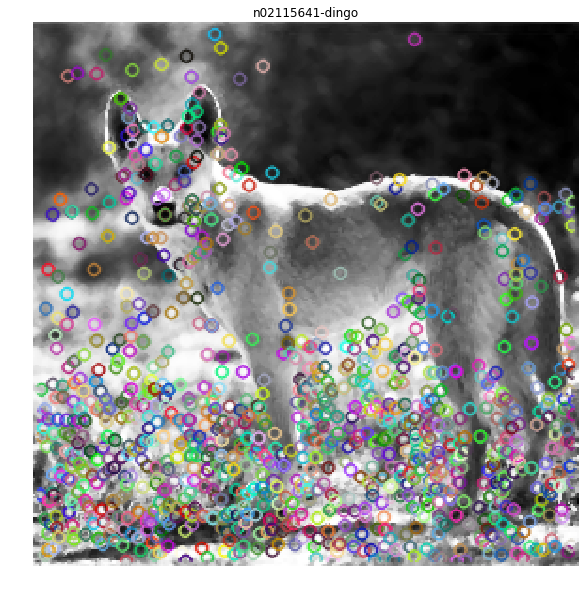

In [10]:
import numpy as np
import p7_util

breedname = 'n02115641-dingo'
imagename = 'n02115641_13565.jpg'
#imagename = 'n02115641_592.jpg'
pil_image = oP7_DataBreed.read_image(breedname,imagename)

np.array(pil_image).shape
pil_image

import P7_DataBreed
pil_image = P7_DataBreed.pil_2gray(pil_image)
pil_image = P7_DataBreed.pil_square(pil_image)
print(np.array(pil_image).shape)
if True :
    filename, pil_image = p7_util.p7_filter_median(pil_image)
    pil_image = P7_DataBreed.pil_autocontrast(pil_image)
    pil_image = P7_DataBreed.pil_equalize(pil_image)

    
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)
#pil_image_0 = pil_image
#pil_image_1 = pil_image

In [28]:
dict_pil_image={0:[pil_image_0], 1:[pil_image_1]}

In [29]:
import P7_DataBreed

list_kpdesc = list()
for id, list_pil_image in dict_pil_image.items():
    for pil_image in list_pil_image :
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image)
        list_kpdesc.append((kp, desc))
dict_pil_image = {breedname : dict_pil_image.values()}
dict_breed_kpdesc={breedname:list_kpdesc}

In [54]:
list_kpdesc = dict_breed_kpdesc[breedname]
len(list_kpdesc)
tuple_kp_desc_1 = list_kpdesc[0]
list_kp_1  = tuple_kp_desc_1[0]
arr_desc_1 = tuple_kp_desc_1[1]

tuple_kp_desc_2 = list_kpdesc[1]
list_kp_2  = tuple_kp_desc_2[0]
arr_desc_2 = tuple_kp_desc_2[1]


In [ ]:
# list_kpdesc contains tuples (kp,desc)
kp1 = list_kp[0]
kp2 = list_kp[1]
desc1 = list_kpdesc[0][1]
desc2 = list_kpdesc[1][1]

In [59]:
image_pil_gray_1 = list(dict_pil_image[breedname])[0][0]
image_pil_gray_2 = list(dict_pil_image[breedname])[1][0]
type(image_pil_gray_2)

PIL.Image.Image

In [60]:
import cv2
import matplotlib.pyplot as plt

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2SQR, crossCheck=True)

# Match descriptors.
matches = bf.match(desc1,desc2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

image_pil_gray_3 = image_pil_gray_1
# Draw first 10 matches.
image_pil_gray_3 = cv2.drawMatches(np.array(image_pil_gray_1),kp1\
                                           ,np.array(image_pil_gray_2),kp2\
                                            ,matches[:20],np.array(image_pil_gray_3), flags=2)

plt.figure(figsize=(20,10))
z_=plt.imshow(image_pil_gray_3),plt.show()

SystemError: <built-in function drawMatches> returned NULL without setting an error

In [ ]:
import p7_util

filename, pil_image = p7_util.p7_filter_median(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)


In [ ]:
import P7_DataBreed
pil_image = P7_DataBreed.pil_equalize(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:
import P7_DataBreed
pil_image_auto = P7_DataBreed.pil_autocontrast(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image_auto,breedname)

In [ ]:
import numpy as np
from PIL import Image

arr_image_auto = np.array(pil_image_auto)
arr_image = np.array(pil_image)

operation = arr_image_auto + arr_image

Image.fromarray(operation)

#### Filtre Gradient

In [ ]:
import P7_DataBreed

import numpy as np
import p7_util

kernel=np.array([[0,1,-1],[0,1,-1],[0,1,-1]])
print(kernel)


filename, pil_image = p7_util.p7_filter_convolutional(pil_image, kernel, size=(3,3))
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

#### Filtre Laplacien

In [ ]:
import P7_DataBreed

import numpy as np
import p7_util

kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1] ])
print(kernel)


filename, pil_image = p7_util.p7_filter_convolutional(pil_image, kernel, size=(3,3))
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

#### Filtre passe-bas

In [ ]:
import P7_DataBreed

import numpy as np
import p7_util

kernel=np.array([[1,1,1],[1,4,1],[1,1,1] ])
print(kernel)


filename, pil_image = p7_util.p7_filter_convolutional(pil_image, kernel, size=(3,3))
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:
import P7_DataBreed
filename, pil_image_gauss = p7_util.p7_filter_gaussian(pil_image, size=3)

P7_DataBreed.show_pil_image_and_kp(pil_image_gauss,breedname)

In [ ]:
import numpy as np
from PIL import Image

arr_pil_image = np.array(pil_image)
arr_pil_image_gauss=np.array(pil_image_gauss)

addition = arr_pil_image - arr_pil_image_gauss

Image.fromarray(addition)

In [ ]:
import P7_DataBreed
filename, pil_image = p7_util.p7_filter_gaussian(pil_image, size=3)

P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:
import P7_DataBreed
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:

breedname = dingo
dict_split_pil_image = self.split_pil_image(pil_image,breedname)
for id_breedname, list_split_pil_image in dict_split_pil_image.items() :
    for split_pil_image in list_split_pil_image :
        kp, desc = get_image_kpdesc(split_pil_image)
        dict_breed_kpdesc[image_count] = (desc,breedname)
        image_count +=1


# Whitening

In [ ]:
arr = np.array([[0,1,2,3],[1,2,3,4],[2,1,2,5],[3,2,3,6]])
print(arr.shape)
print(arr)
margin=1

# Horizontal truncation
arr = arr[margin:,:]
arr = arr[:-margin,:]

# Vertical truncation
arr = arr[:,margin:]
arr = arr[:,:-margin]

print(arr)

In [ ]:
import numpy as np

breedname = 'n02115641-dingo'
imagename = 'n02115641_13565.jpg'

pil_image = oP7_DataBreed.read_image('n02115641-dingo','n02115641_13565.jpg')

np.array(pil_image).shape
pil_image = P7_DataBreed.pil_2gray(pil_image)
arr_image = np.array(pil_image)

def image_square(pil_image):
    arr_image = np.array(pil_image)

    delta = arr_image.shape[0] - arr_image.shape[1]
    margin = np.abs(int(delta/2))
    print(arr_image.shape)
    if arr_image.shape[0] >= arr_image.shape[1]:
        # Horizontal truncation
        arr_image = arr_image[margin:,:]
        arr_image = arr_image[:-margin,:]

    else :
        # Vertical truncation
        arr_image = arr_image[:,margin:]
        arr_image = arr_image[:,:-margin]
    return Image.fromarray(arr_image)
    
image_square(pil_image)

In [ ]:
np.array(pil_image).shape

In [ ]:
import P7_DataBreed
oP7_DataBreed = P7_DataBreed.P7_DataBreed()
oP7_DataBreed.std_size=(208,208)
dict_pil_image = oP7_DataBreed.split_pil_image(pil_image,breedname.split('-')[1], ratio=(13,13))

dict_pil_image.keys()


In [ ]:
print(int(208/13))

In [ ]:
import p7_util
p7_util.p7_image_pil_show(dict_pil_image,std_image_size=(16,16),size_x=16, is_title=False)

In [ ]:
import numpy as np

dict_pil_white = dict()
raw=0

for breedname, list_image in dict_pil_image.items():
    list_pil_white = list()
    for image in list_image:
        list_pil_white.append(zca_whitening_matrix(np.array(image)))
    dict_pil_white[raw] = list_pil_white
    raw +=1
        

In [ ]:
all_arr = np.zeros((16,16*27+16))

for raw, list_pil_white in dict_pil_white.items() :
    arr = np.zeros((16,16))
    for pil_white in list_pil_white :
        arr = np.hstack((arr,np.array(pil_white)))
    all_arr = np.vstack((all_arr,arr))
    print(arr.shape, all_arr.shape)


In [ ]:
import p7_util
p7_util.p7_image_pil_show(dict_pil_white,std_image_size=(16,16),size_x=16, is_title=False)

In [ ]:
help(Image.fromarray)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_arr)